In [47]:
using LatPhysBandstructures
using LatticePhysics
using HDF5
using LatPhysBandstructuresPlottingPyPlot

┌ Info: Recompiling stale cache file /home/jattig/.julia/compiled/v1.0/LatPhysBandstructuresPlottingPyPlot/IEXX0.ji for LatPhysBandstructuresPlottingPyPlot [66177000-74be-527b-8584-e3f8efd22c83]
└ @ Base loading.jl:1184


# Bond Hamiltonians

In [2]:
function saveBondHamiltonian(
        hb :: HB,
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
        ;
        append :: Bool = false
    ) where {L,N,HB<:AbstractBondHamiltonian{L,N}}
    
    # print an error because implementation for concrete type is missing
    error("not implemented interface function 'saveBondHamiltonian' for bond Hamiltonian type " * string(typeof(hb)))
end


# convinience function for standard type
function loadBondHamiltonian(
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
    )
    
    # find out the type
    T = getBondHamiltonianType(Val(Symbol(h5readattr(fn, group)["type"])))
    
    # return the loaded bond hamiltonian
    return loadBondHamiltonian(T, fn, group)
end

function getBondHamiltonianType(
        ::Val{HB}
    ) where {HB}
    
    error("Type $(HB) could not be identified, i.e. getBondHamiltonianType(Val{:$(HB)}) is missing")
end

getBondHamiltonianType (generic function with 1 method)

In [3]:
function getBondHamiltonianType(
        ::Val{:BondHoppingHamiltonianSimple}
    )
    
    # return the type
    return BondHoppingHamiltonianSimple    
end

function saveBondHamiltonian(
        hb :: HB,
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
        ;
        append :: Bool = false
    ) where {L,HB<:BondHoppingHamiltonianSimple{L}}
    
    # determine the mode based on if one wants to append stuff
    if append
        mode = "r+"
    else
        mode = "w"
    end

    # open the file in mode
    h5open(fn, mode) do file
        # create the group in which the bonds are saved
        group_hb = g_create(file, group)
        # save the type identifier
        attrs(group_hb)["type"] = "BondHoppingHamiltonianSimple"
        # save the parameters
        attrs(group_hb)["N"] = 1
        attrs(group_hb)["L"] = string(L)
        # save the Float64 coupling
        group_hb["coupling"] = hb.coupling
    end

    # return nothing
    return nothing
end

function loadBondHamiltonian(
        ::Type{HB},
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
    ) where {LI,HB<:Union{BondHoppingHamiltonianSimple{LI},BondHoppingHamiltonianSimple}}

    # read attribute data
    attr_data = h5readattr(fn, group)
    # determine D based on this
    L = Meta.eval(Meta.parse(attr_data["L"]))
    N = attr_data["N"]

    # load all remaining data
    coupling = h5read(fn, group*"/coupling")

    # return the new bond hamiltonian
    return BondHoppingHamiltonianSimple{L}(coupling)
end

loadBondHamiltonian (generic function with 4 methods)

In [4]:
hb = BondHoppingHamiltonianSimple{Int64}(3.0)
saveBondHamiltonian(hb, "test.h5")
hb

BondHoppingHamiltonianSimple{Int64}(3.0)

In [5]:
loadBondHamiltonian("test.h5")

BondHoppingHamiltonianSimple{Int64}(3.0)

In [6]:
function getBondHamiltonianType(
        ::Val{:BondHoppingHamiltonianSimpleNN}
    )
    
    # return the type
    return BondHoppingHamiltonianSimpleNN    
end

function saveBondHamiltonian(
        hb :: HB,
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
        ;
        append :: Bool = false
    ) where {L,HB<:BondHoppingHamiltonianSimpleNN{L}}
    
    # determine the mode based on if one wants to append stuff
    if append
        mode = "r+"
    else
        mode = "w"
    end

    # open the file in mode
    h5open(fn, mode) do file
        # create the group in which the bonds are saved
        group_hb = g_create(file, group)
        # save the type identifier
        attrs(group_hb)["type"] = "BondHoppingHamiltonianSimpleNN"
        # save the parameters
        attrs(group_hb)["N"]  = 1
        attrs(group_hb)["L"]  = string(L)
        # save the Float64 coupling
        group_hb["coupling"]  = hb.coupling
        if L <: Number
            group_hb["label"] = hb.label
        else
            group_hb["label"] = string(hb.label)
        end
    end

    # return nothing
    return nothing
end

function loadBondHamiltonian(
        ::Type{HB},
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
    ) where {LI,HB<:Union{BondHoppingHamiltonianSimpleNN{LI},BondHoppingHamiltonianSimpleNN}}

    # read attribute data
    attr_data = h5readattr(fn, group)
    # determine D based on this
    L = Meta.eval(Meta.parse(attr_data["L"]))
    N = attr_data["N"]

    # load coupling
    coupling  = h5read(fn, group*"/coupling")
    
    # load label
    label     = L(h5read(fn, group*"/label"))

    # return the new bond hamiltonian
    return BondHoppingHamiltonianSimpleNN{L}(coupling, label)
end

loadBondHamiltonian (generic function with 6 methods)

In [7]:
hb = BondHoppingHamiltonianSimpleNN{String}(3.0, "test")
saveBondHamiltonian(hb, "test.h5")
hb

BondHoppingHamiltonianSimpleNN{String}(3.0, "test")

In [8]:
loadBondHamiltonian("test.h5")

BondHoppingHamiltonianSimpleNN{String}(3.0, "test")

In [9]:
function getBondHamiltonianType(
        ::Val{:BondHoppingHamiltonianDict}
    )
    
    # return the type
    return BondHoppingHamiltonianDict    
end

function saveBondHamiltonian(
        hb :: HB,
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
        ;
        append :: Bool = false
    ) where {L,HB<:BondHoppingHamiltonianDict{L}}
    
    # determine the mode based on if one wants to append stuff
    if append
        mode = "r+"
    else
        mode = "w"
    end

    # open the file in mode
    h5open(fn, mode) do file
        # create the group in which the bonds are saved
        group_hb = g_create(file, group)
        # save the type identifier
        attrs(group_hb)["type"] = "BondHoppingHamiltonianDict"
        # save the parameters
        attrs(group_hb)["N"]    = 1
        attrs(group_hb)["L"]    = string(L)
        # save the labels
        if L <: Number
            group_hb["labels"]  = [p[1] for p in hb.couplings]
        else
            group_hb["labels"]  = [string(p[1]) for p in hb.couplings]
        end
        # save the Float64 couplings
        group_hb["couplings"]   = [p[2] for p in hb.couplings]
    end

    # return nothing
    return nothing
end

function loadBondHamiltonian(
        ::Type{HB},
        fn :: AbstractString,
        group :: AbstractString = "bond_hamiltonian"
    ) where {LI,HB<:Union{BondHoppingHamiltonianDict{LI},BondHoppingHamiltonianDict}}

    # read attribute data
    attr_data = h5readattr(fn, group)
    # determine D based on this
    L = Meta.eval(Meta.parse(attr_data["L"]))
    N = attr_data["N"]

    # load coupling
    couplings  = h5read(fn, group*"/couplings")
    
    # load label
    labels     = L.(h5read(fn, group*"/labels"))
    
    # return the new bond hamiltonian
    return BondHoppingHamiltonianDict{L}(Dict([(labels[i], couplings[i]) for i in 1:length(labels)]))
end

loadBondHamiltonian (generic function with 8 methods)

In [10]:
hb = BondHoppingHamiltonianDict{String}(Dict("x"=>0.5, "y"=>-0.5))
saveBondHamiltonian(hb, "test.h5")
hb

BondHoppingHamiltonianDict{String}(Dict("x"=>0.5,"y"=>-0.5))

In [11]:
loadBondHamiltonian("test.h5")

BondHoppingHamiltonianDict{String}(Dict("x"=>0.5,"y"=>-0.5))

# Hamiltonian

In [27]:
function saveHamiltonian(
        h  :: H,
        fn :: AbstractString,
        group :: AbstractString = "hamiltonian"
        ;
        append :: Bool = false
    ) where {L,UC<:AbstractUnitcell,N,HB<:AbstractBondHamiltonian{L,N}, H<:Hamiltonian{L,UC,HB}}
    
    # determine the mode based on if one wants to append stuff
    if append
        mode = "r+"
    else
        mode = "w"
    end
    
    # group for bond hamiltonian
    group_hb = group*"/bond_hamiltonian"
    # group for unitcell
    group_uc = group*"/unitcell"

    # open the file in mode
    h5open(fn, mode) do file
        # create the group in which the bonds are saved
        group_h = g_create(file, group)
        # save the parameters
        attrs(group_h)["N"] = N
        attrs(group_h)["L"] = string(L)
        # save the groups
        attrs(group_h)["bond_hamiltonian"] = group_hb
        attrs(group_h)["unitcell"]         = group_uc
    end
    
    # save bond hamiltonian and unitcell in respective groups (append!)
    saveBondHamiltonian(bondHamiltonian(h), fn, group_hb, append=true)
    saveUnitcell(unitcell(h), fn, group_uc, append=true)

    # return nothing
    return nothing
end

function loadHamiltonian(
        ::Type{H},
        fn :: AbstractString,
        group :: AbstractString = "hamiltonian"
    ) where {L,UC<:AbstractUnitcell,N,HB<:AbstractBondHamiltonian{L,N}, H<:Union{Hamiltonian{L,UC,HB}, Hamiltonian}}

    # read attribute data
    attr_data = h5readattr(fn, group)
    
    # load bond hamiltonian
    hb = loadBondHamiltonian(fn, attr_data["bond_hamiltonian"])
    # load unitcell
    uc = loadUnitcell(fn, attr_data["unitcell"])

    # return the new hamiltonian
    return Hamiltonian(uc, hb)
end

function loadHamiltonian(
        fn :: AbstractString,
        group :: AbstractString = "hamiltonian"
    )
    
    return loadHamiltonian(Hamiltonian, fn, group)
end

loadHamiltonian (generic function with 4 methods)

In [38]:
uc = getUnitcellHoneycomb(Symbol, String)
hb = BondHoppingHamiltonianSimpleNN{String}(2.0, "l")
h  = Hamiltonian(uc, hb)
saveHamiltonian(h, "test.h5")
h

Hamiltonian{String,Unitcell{Site{Symbol,2},Bond{String,2}},BondHoppingHamiltonianSimpleNN{String}}(Unitcell object
--> type Unitcell{Site{Symbol,2},Bond{String,2}}
--> 2 sites of type Site{Symbol,2}
--> 6 bonds of type Bond{String,2}, BondHoppingHamiltonianSimpleNN{String}(2.0, "l"))

In [39]:
loadHamiltonian("test.h5")

Hamiltonian{String,Unitcell{Site{Symbol,2},Bond{String,2}},BondHoppingHamiltonianSimpleNN{String}}(Unitcell object
--> type Unitcell{Site{Symbol,2},Bond{String,2}}
--> 2 sites of type Site{Symbol,2}
--> 6 bonds of type Bond{String,2}, BondHoppingHamiltonianSimpleNN{String}(2.0, "l"))

# Bandstructure

In [74]:
function saveBandstructure(
        bs :: BS,
        fn :: AbstractString,
        group :: AbstractString = "bandstructure"
        ;
        append :: Bool = false
    ) where {RP, P<:AbstractReciprocalPath{RP}, L,UC,HB,H<:AbstractHamiltonian{L,UC,HB}, BS<:Bandstructure{P,H}}
    
    # determine the mode based on if one wants to append stuff
    if append
        mode = "r+"
    else
        mode = "w"
    end
    
    # group for hamiltonian
    group_h = group*"/hamiltonian"
    # group for path
    group_p = group*"/path"
    # group for energy bands
    group_e = group*"/bands"

    # open the file in mode
    h5open(fn, mode) do file
        # create the group in which the bonds are saved
        group_bs = g_create(file, group)
        # write number of segments
        attrs(group_bs)["segments"]    = length(bs.bands)
        # save the groups
        attrs(group_bs)["hamiltonian"] = group_h
        attrs(group_bs)["path"]        = group_p
        attrs(group_bs)["bands"]       = group_e
    end
    
    # save hamiltonian
    saveHamiltonian(hamiltonian(bs), fn, group_h, append=true)
    # save reciprocal path
    saveReciprocalPath(path(bs), fn, group_p, append=true)
    
    # save the individual segments within the bands group
    h5open(fn, "r+") do file
        # create the group in which the bonds are saved
        group_bands = g_create(file, group_e)
        # save the individual segments
        for si in 1:length(bs.bands)
            s = bs.bands[si]
            # reformat segment and save as matrix
            #segmat = [s[j][i] for i in 1:length(s[1]) for j in 1:length(s)]
            segmat = zeros(length(s[1]), length(s))
            for i in 1:length(s[1])
                for j in 1:length(s)
                    segmat[i,j] = s[j][i]
                end
            end
            # save
            group_bands["segment_$(si)"] = segmat
        end
    end
    
    # return nothing
    return nothing
end

function loadBandstructure(
        ::Type{BS},
        fn :: AbstractString,
        group :: AbstractString = "bandstructure"
    ) where {RP, P<:AbstractReciprocalPath{RP}, L,UC,HB,H<:AbstractHamiltonian{L,UC,HB}, BS<:Union{Bandstructure, Bandstructure{P,H}}}
    
    # read attribute data
    attr_data = h5readattr(fn, group)
    
    # group for hamiltonian
    group_h = attr_data["hamiltonian"]
    # group for path
    group_p = attr_data["path"]
    # group for energy bands
    group_e = attr_data["bands"]
    
    # load number of segments
    segments = attr_data["segments"]
    
    # load hamiltonian
    h = loadHamiltonian(fn, group_h)
    # load path
    p = loadReciprocalPath(fn, group_p)
    
    # load all energy bands
    bds = Vector{Vector{Float64}}[]
    # iterate over all expected segments
    for s in 1:segments
        # load segment as matrix
        segmat = h5read(fn, group_e*"/segment_$(s)")
        # reformat segment and push to list
        segment = Vector{Float64}[
            Float64[segmat[i,b] for i in 1:size(segmat,1)]
            for b in 1:size(segmat,2)
        ]
        # push to the list
        push!(bds, segment)
    end

    # return the new Bandstructure
    bs = getBandstructure(h,p,recalculate=false)
    bs.bands = bds
    return bs
end

function loadBandstructure(
        fn :: AbstractString,
        group :: AbstractString = "bandstructure"
    )
    
    return loadBandstructure(Bandstructure, fn, group)
end

loadBandstructure (generic function with 6 methods)

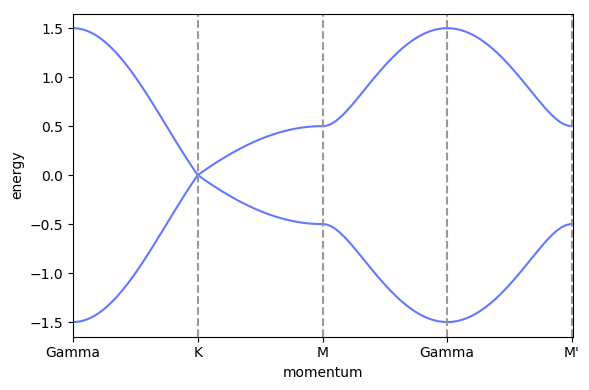

In [86]:
uc = getUnitcellHoneycomb()
bs = getBandstructure(uc, :Gamma, :K, :M, :Gamma, :Mp);
saveBandstructure(bs, "test.h5")
plotBandstructure(bs);

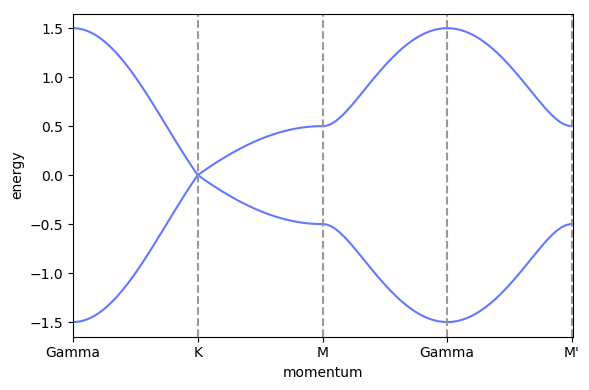

In [87]:
bsp = loadBandstructure("test.h5")
plotBandstructure(bsp);